In [2]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install openpyxl
!pip3 install -U scikit-learn scipy matplotlib

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import pickle
import math
import matplotlib.pyplot as plt

import re


In [4]:
df = pd.read_excel('Dataset_Hackathon.xlsx')
df.head()


,Country,Commodity,Flow,Quantity,Category,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,34,02_meat_and_edible_meat_offal,12,5940.830501,4840.697837
1,Albania,"Poultry cuts & offal, except livers, fresh or ...",Export,23,02_meat_and_edible_meat_offal,12,5940.830501,3069.710823
2,Albania,"Swine meat, salted/dried/smoked not ham/should...",Export,11,02_meat_and_edible_meat_offal,12,5940.830501,1475.822511
3,Albania,"Fowls, domestic, whole, frozen",Export,50,02_meat_and_edible_meat_offal,12,5940.830501,7083.948054
4,Albania,"Meat and edible offal nes fresh, chilled or fr...",Export,71,02_meat_and_edible_meat_offal,12,5940.830501,9976.560176


In [5]:
df.columns

Index(['Country', 'Commodity', 'Flow', 'Quantity', 'Category', 'Volume (m^3)',
       'Distance from India (m)', 'Frieght Cost (USD)'],
      dtype='object')

In [6]:
len(df['Country'].value_counts())

166

In [7]:
len(df['Commodity'].value_counts())

426

In [8]:
df['Flow'].value_counts()

Export       72361
Re-Export     9084
Name: Flow, dtype: int64

In [9]:
df['Category'].value_counts()

09_coffee_tea_mate_and_spices                             12231
07_edible_vegetables_and_certain_roots_and_tubers          9160
03_fish_crustaceans_molluscs_aquatic_invertebrates_ne      8608
08_edible_fruit_nuts_peel_of_citrus_fruit_melons           8030
11_milling_products_malt_starches_inulin_wheat_glute       7908
12_oil_seed_oleagic_fruits_grain_seed_fruit_etc_ne         7163
04_dairy_products_eggs_honey_edible_animal_product_nes     7157
02_meat_and_edible_meat_offal                              6912
05_products_of_animal_origin_nes                           5223
10_cereals                                                 5040
06_live_trees_plants_bulbs_roots_cut_flowers_etc           4013
Name: Category, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81445 entries, 0 to 81444
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  81445 non-null  object 
 1   Commodity                81445 non-null  object 
 2   Flow                     81445 non-null  object 
 3   Quantity                 81445 non-null  int64  
 4   Category                 81445 non-null  object 
 5   Volume (m^3)             81445 non-null  int64  
 6   Distance from India (m)  81445 non-null  float64
 7   Frieght Cost (USD)       81445 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [11]:
df = df.drop(['Commodity','Country','Flow','Category'], axis = 1)

In [12]:
df.head()

,Quantity,Volume (m^3),Distance from India (m),Frieght Cost (USD)
0,34,12,5940.830501,4840.697837
1,23,12,5940.830501,3069.710823
2,11,12,5940.830501,1475.822511
3,50,12,5940.830501,7083.948054
4,71,12,5940.830501,9976.560176


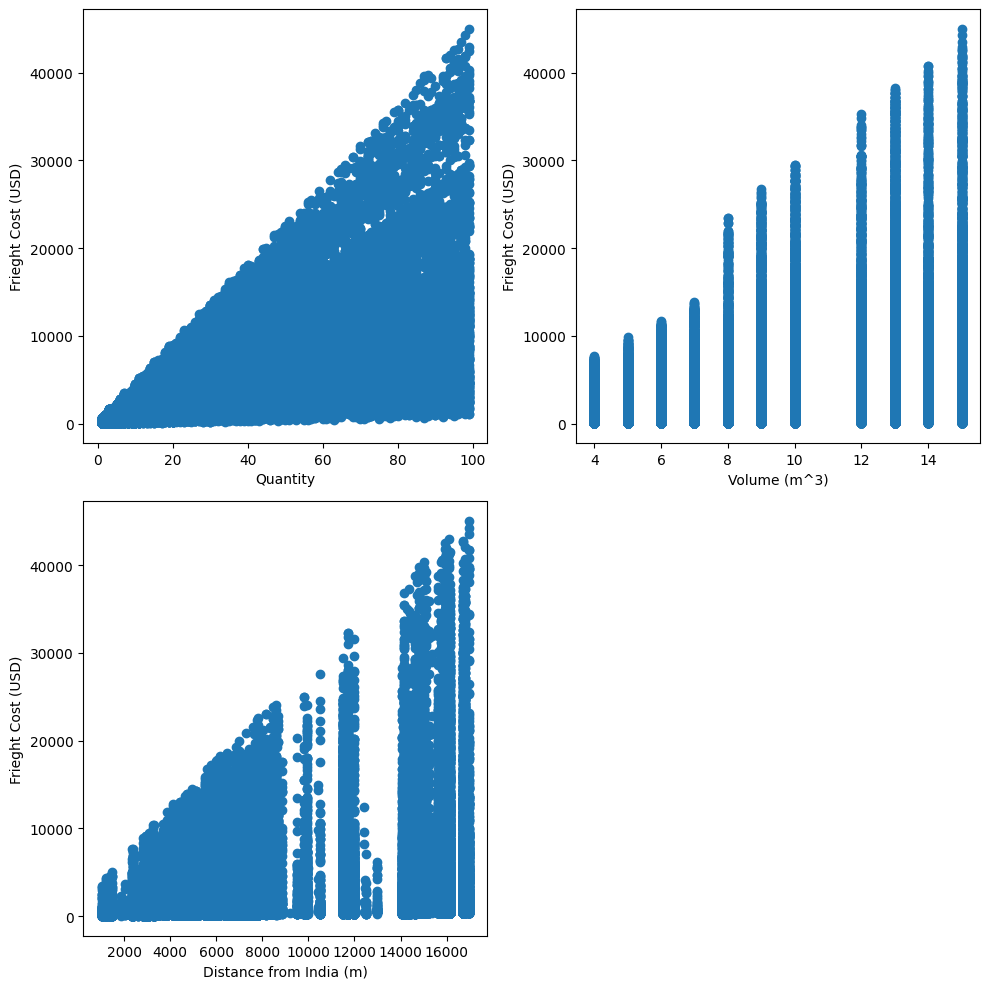

In [13]:
columns = df.drop("Frieght Cost (USD)", axis="columns").columns
halfcol = math.ceil(len(columns)/2)
fig = plt.figure(figsize=(10,10))

for i in range(len(columns)):
    plt.subplot(halfcol, halfcol, i+1)
    column = columns[i]
    plt.xlabel(column)
    plt.ylabel("Frieght Cost (USD)")
    plt.scatter(df[column], df["Frieght Cost (USD)"])

fig.tight_layout()

In [14]:
df.columns

Index(['Quantity', 'Volume (m^3)', 'Distance from India (m)',
       'Frieght Cost (USD)'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81445 entries, 0 to 81444
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Quantity                 81445 non-null  int64  
 1   Volume (m^3)             81445 non-null  int64  
 2   Distance from India (m)  81445 non-null  float64
 3   Frieght Cost (USD)       81445 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 2.5 MB


In [16]:
X = df[['Quantity','Volume (m^3)',
       'Distance from India (m)', #'Frieght Cost (USD)'
]]
y = df['Frieght Cost (USD)']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [18]:
from xgboost import XGBRegressor
model = XGBRegressor()


# from sklearn.linear_model import LinearRegression
# model = LinearRegression()


In [19]:

# y_transformed = lab.fit_transform(y_train)

model.fit(X_train, y_train)
model.score(X_test, y_test)




0.9980948190752791

In [20]:
pickle.dump(model, open('modell.pkl','wb'))

In [21]:
from pickle import load
filename = 'modell.pkl'
loaded_model = load(open(filename, 'rb'))


In [22]:

prediction=loaded_model.predict(X_test)

prediction




array([  305.54413,  1479.0326 ,  1000.81024, ...,   779.69476,
         118.05307, 23490.416  ], dtype=float32)